In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import datetime as dt
from scipy.stats import describe,ttest_ind,stats, norm
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from Plotting import Plotting

In [42]:
df= pd.read_csv("train.csv")

In [43]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [44]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [46]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [47]:
for col in df.columns:
    print(col)
    print(df[col].describe())


battery_power
count    2000.000000
mean     1238.518500
std       439.418206
min       501.000000
25%       851.750000
50%      1226.000000
75%      1615.250000
max      1998.000000
Name: battery_power, dtype: float64
blue
count    2000.0000
mean        0.4950
std         0.5001
min         0.0000
25%         0.0000
50%         0.0000
75%         1.0000
max         1.0000
Name: blue, dtype: float64
clock_speed
count    2000.000000
mean        1.522250
std         0.816004
min         0.500000
25%         0.700000
50%         1.500000
75%         2.200000
max         3.000000
Name: clock_speed, dtype: float64
dual_sim
count    2000.000000
mean        0.509500
std         0.500035
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: dual_sim, dtype: float64
fc
count    2000.000000
mean        4.309500
std         4.341444
min         0.000000
25%         1.000000
50%         3.000000
75%         7.000000
max        19.000000
Name:

# New Section

In [48]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [49]:
for col in df.columns:
    print(col)
    print(describe(df[col]))


battery_power
DescribeResult(nobs=2000, minmax=(501, 1998), mean=1238.5185, variance=193088.35983766886, skewness=0.03187454295305568, kurtosis=-1.224084165725428)
blue
DescribeResult(nobs=2000, minmax=(0, 1), mean=0.495, variance=0.2501000500250125, skewness=0.02000100007500624, kurtosis=-1.9995999599959997)
clock_speed
DescribeResult(nobs=2000, minmax=(0.5, 3.0), mean=1.52225, variance=0.6658628689344673, skewness=0.17795052935349268, kurtosis=-1.3231094949498647)
dual_sim
DescribeResult(nobs=2000, minmax=(0, 1), mean=0.5095, variance=0.2500347673836919, skewness=-0.03800686085763292, kurtosis=-1.9985554785277484)
fc
DescribeResult(nobs=2000, minmax=(0, 19), mean=4.3095, variance=18.84813381690845, skewness=1.0190463925723268, kurtosis=0.27338561771466496)
four_g
DescribeResult(nobs=2000, minmax=(0, 1), mean=0.5215, variance=0.24966258129064536, skewness=-0.08607961742649396, kurtosis=-1.9925902994637084)
int_memory
DescribeResult(nobs=2000, minmax=(2, 64), mean=32.0465, variance=329

H0: There is no statistically significant difference between any of the features between group one and group two other than the battery power.

H1: there is a statistically significan difference between the groups tested other than the battery power.


In [50]:
#hypothesis testing
group1 = df[df["battery_power"] == df["battery_power"].max()]
group2 = df[df["battery_power"] == df["battery_power"].min()]

t_statistic, p_value = stats.ttest_ind(group1, group2)

significance_value = 0.05
for col, value in zip(df.columns, p_value):
    if value < significance_value:
        print("For column {}:".format(col))
        print("The t-statistic is:", t_statistic[df.columns.get_loc(col)])
        print("The p-value is:", value)
        print("We reject the null hypothesis. There is a statistically significant difference between the groups.")
    else:
        print("For column {}:".format(col))
        print("The t-statistic is:", t_statistic[df.columns.get_loc(col)])
        print("The p-value is:", value)
        print("We fail to reject the null hypothesis. No statistically significant difference found between the groups.")


For column battery_power:
The t-statistic is: inf
The p-value is: 0.0
We reject the null hypothesis. There is a statistically significant difference between the groups.
For column blue:
The t-statistic is: 0.5773502691896258
The p-value is: 0.6666666666666667
We fail to reject the null hypothesis. No statistically significant difference found between the groups.
For column clock_speed:
The t-statistic is: -0.12830005981991682
The p-value is: 0.9187654367290609
We fail to reject the null hypothesis. No statistically significant difference found between the groups.
For column dual_sim:
The t-statistic is: -0.5773502691896258
The p-value is: 0.6666666666666667
We fail to reject the null hypothesis. No statistically significant difference found between the groups.
For column fc:
The t-statistic is: -2.886751345948129
The p-value is: 0.21229561500965655
We fail to reject the null hypothesis. No statistically significant difference found between the groups.
For column four_g:
The t-statistic

<ipython-input-50-63ad890c486a>:5: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:551: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.


In [51]:
plot =Plotting(df)

Available plot options:
1. Violin Plot
2. Histogram
3. Correlation Heatmap
4. Choropleth Map
5. Line Plot
Enter the number of the plot you want to create: 2


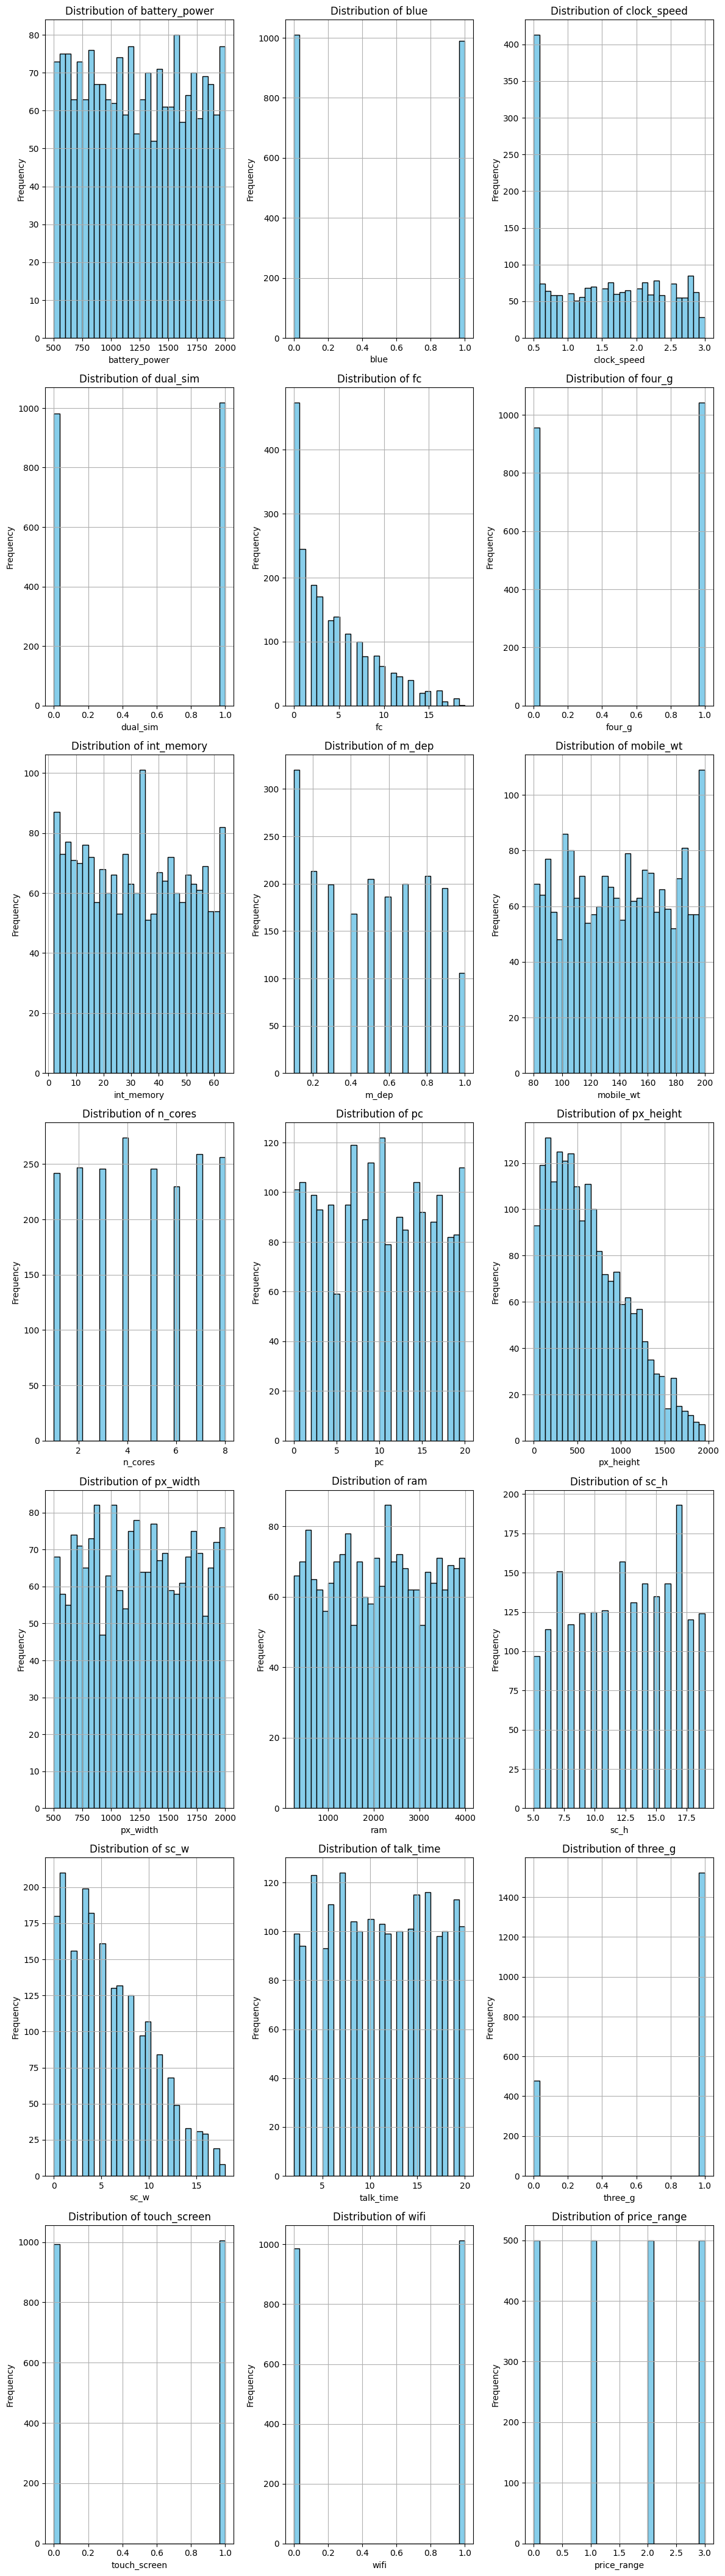

In [52]:
plot.select_plot()

Available plot options:
1. Violin Plot
2. Histogram
3. Correlation Heatmap
4. Choropleth Map
5. Line Plot
Enter the number of the plot you want to create: 3
Do you want the corr of all or of specific columns? [1 = All, 2 = Specific]1


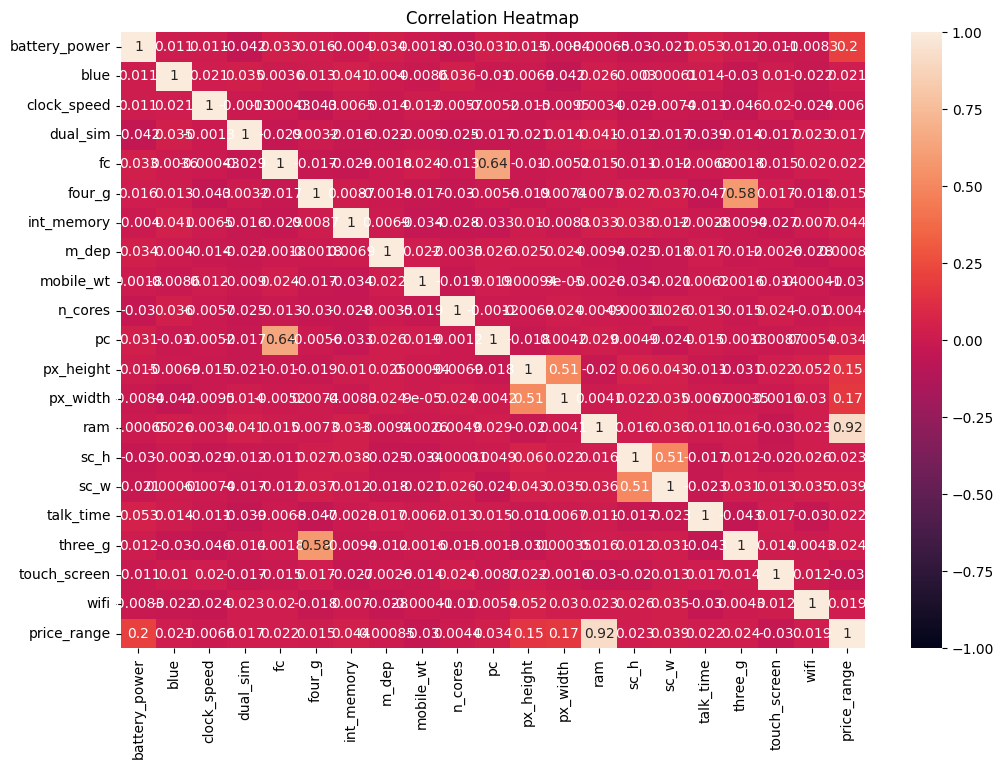

In [53]:
plot.select_plot()


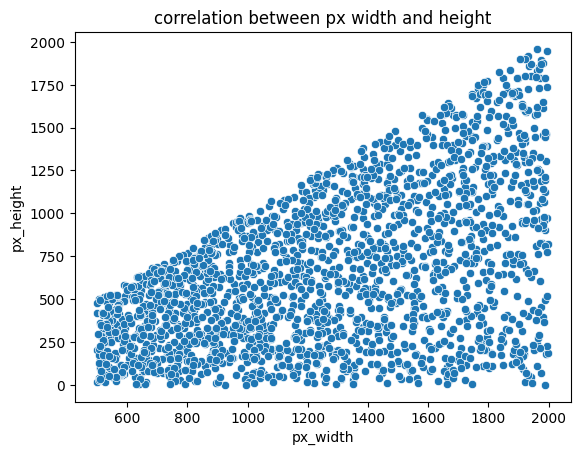

In [63]:
sns.scatterplot(x="px_width", y="px_height", data=df)
plt.title("correlation between px width and height")
plt.show()

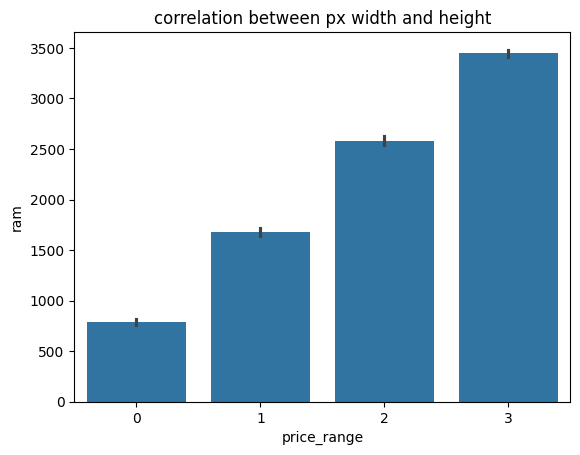

In [66]:
sns.barplot(y="ram", x="price_range", data=df)
plt.title("correlation between px width and height")
plt.show()

Available plot options:
1. Violin Plot
2. Histogram
3. Correlation Heatmap
4. Choropleth Map
5. Line Plot
Enter the number of the plot you want to create: 1
Enter the columns to plot (comma-separated, no space): ram
Enter the title for the plot: ram distributiom
Enter the xlabel for the plot: ram
Enter the ylabel for the plot: frequency


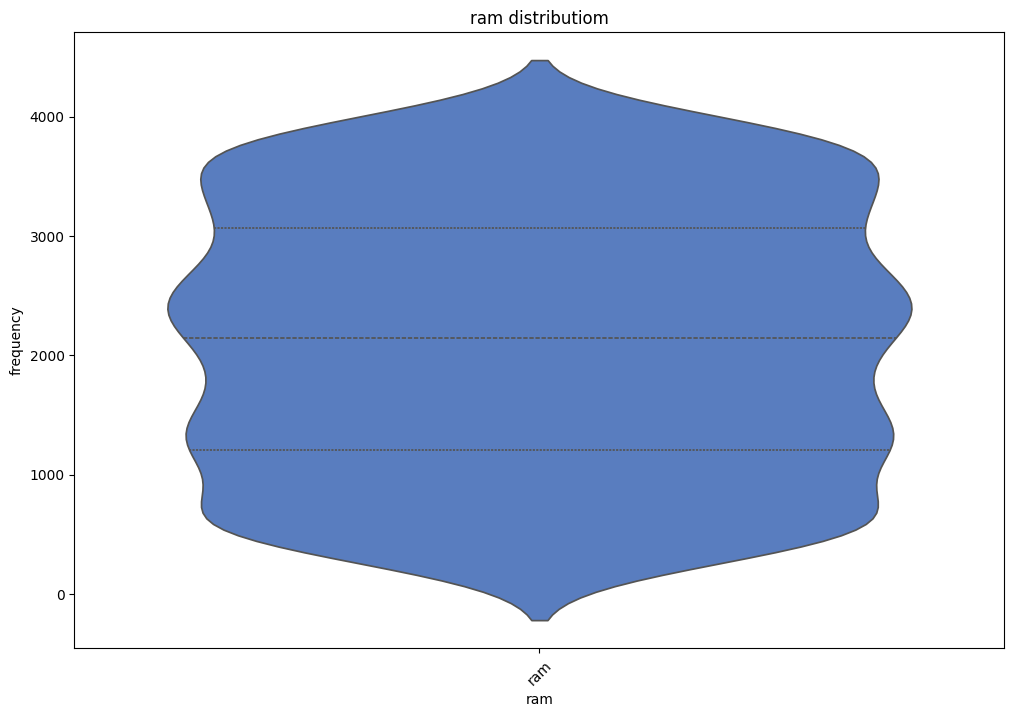

In [54]:
,,plot.select_plot()


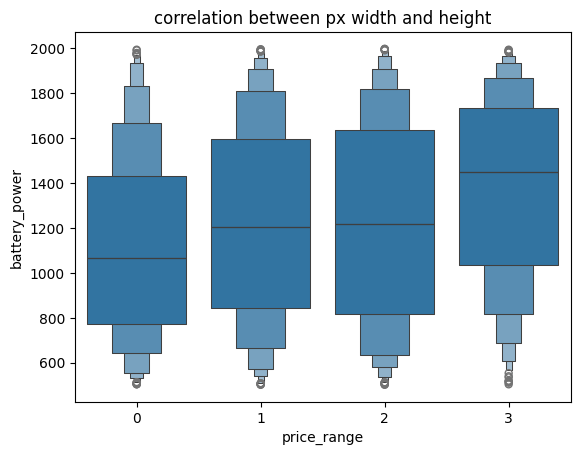

In [69]:
sns.boxenplot(x="price_range", y="battery_power", data=df)
plt.title("correlation between px width and height")
plt.show()